# Model Training

Principal Component Analysis (PCA)

[4.05210996e-01 2.61892285e-01 1.98345591e-01 1.34551127e-01
 8.90985301e-33]


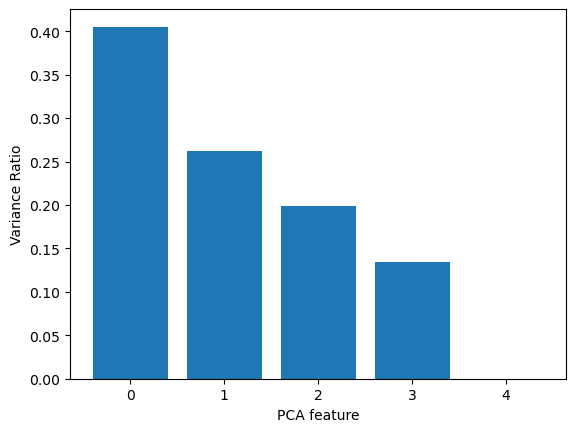

[[ 1.32190829e+00 -7.82593850e-01 -1.91316957e+00]
 [ 1.15001870e+00 -1.81681292e+00 -2.00280489e+00]
 [-1.32003278e+00  6.07360185e-01 -1.54554081e+00]
 [-1.61384934e+00 -1.15995935e+00 -1.69845016e+00]
 [-1.37654369e+00  2.34456765e-01 -1.54614161e+00]
 [-1.61503894e+00 -1.18630229e+00 -1.66186804e+00]
 [-1.18676491e+00  1.34840967e+00 -1.41527543e+00]
 [-1.68466941e+00 -1.62589038e+00 -1.66185919e+00]
 [ 1.87798964e+00  2.41946410e+00 -1.51513053e+00]
 [-1.52333871e+00 -6.86323906e-01 -1.54778664e+00]
 [ 1.85403933e+00  2.27207653e+00 -1.52961711e+00]
 [-1.60223657e+00 -1.16596003e+00 -1.59192534e+00]
 [-1.02590985e+00  2.24540259e+00 -1.27673100e+00]
 [-1.59405689e+00 -1.12399330e+00 -1.54319834e+00]
 [ 1.60610643e+00  7.99600664e-01 -1.59831394e+00]
 [ 1.18162771e+00 -1.73032429e+00 -1.80503361e+00]
 [-1.30873721e+00  5.55017103e-01 -1.36846364e+00]
 [ 1.22590297e+00 -1.48254749e+00 -1.74439725e+00]
 [ 1.67023099e+00  1.10519314e+00 -1.46705592e+00]
 [-1.58645474e+00 -1.15286177e+

In [9]:
# Apply PCA
pca = PCA()
pca.fit(customer_scaled)
print(pca.explained_variance_ratio_)

# Plot the explained variance ratio
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_)
plt.xticks(features)
plt.ylabel('Variance Ratio')
plt.xlabel('PCA feature')
plt.show()

# Reduce to 3 principal components
pca = PCA(n_components = 3)
customer_pca = pca.fit_transform(customer_scaled)
print(customer_pca)

K-Means Clustering

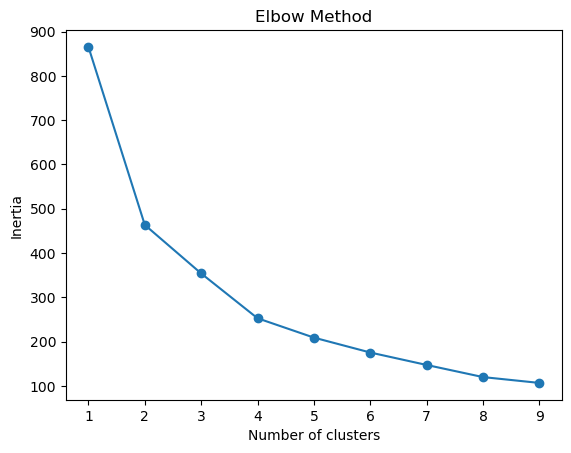

In [10]:
# Determine the optimal number of clusters using the Elbow method
inertia = []
for cluster in range(1, 10):
    kmeans = KMeans(n_clusters=cluster, random_state=42)
    kmeans.fit(customer_pca)
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()



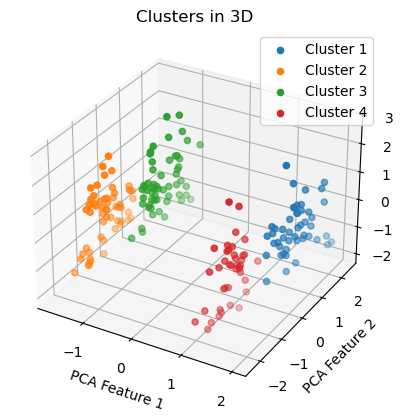

In [11]:
# Fit K-Means with the optimal number of clusters
kmeans = KMeans(n_clusters=4, random_state=42)
cluster_labels = kmeans.fit_predict(customer_pca)

# 3D plot of the clusters
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for cluster in range(4):
    cluster_points = customer_pca[cluster_labels == cluster]
    ax.scatter(cluster_points[:, 0], cluster_points[:, 1], cluster_points[:, 2], label=f'Cluster {cluster + 1}')
ax.set_xlabel('PCA Feature 1')
ax.set_ylabel('PCA Feature 2')
ax.set_zlabel('PCA Feature 3')
ax.set_title('Clusters in 3D')
plt.legend()
plt.show()